In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [4]:
#silicon HV data for neutrons
import pandas as pds
import os

si_data = pds.read_csv('papers/data/silicon_HV_neutron_full.txt', skiprows=1, \
                         names=['recoilE', 'rate'], \
                         sep='\s+')


print (si_data.head(100))

si_erec = np.asarray(si_data["recoilE"])
si_rate = np.asarray(si_data["rate"])


    recoilE    rate
0   0.0394,  0.4551
1   0.0388,  0.4952
2   0.0382,  0.5390
3   0.0376,  0.5554
4    0.037,  0.6045
..      ...     ...
95  0.0231,  0.7764
96  0.0231,  0.8199
97  0.0227,  0.8923
98  0.0227,  0.9422
99  0.0224,  1.0255

[100 rows x 2 columns]


In [5]:
#smooth the data
si_rate_smooth = signal.savgol_filter(si_rate, 501, 3) # window size 501, polynomial order 3

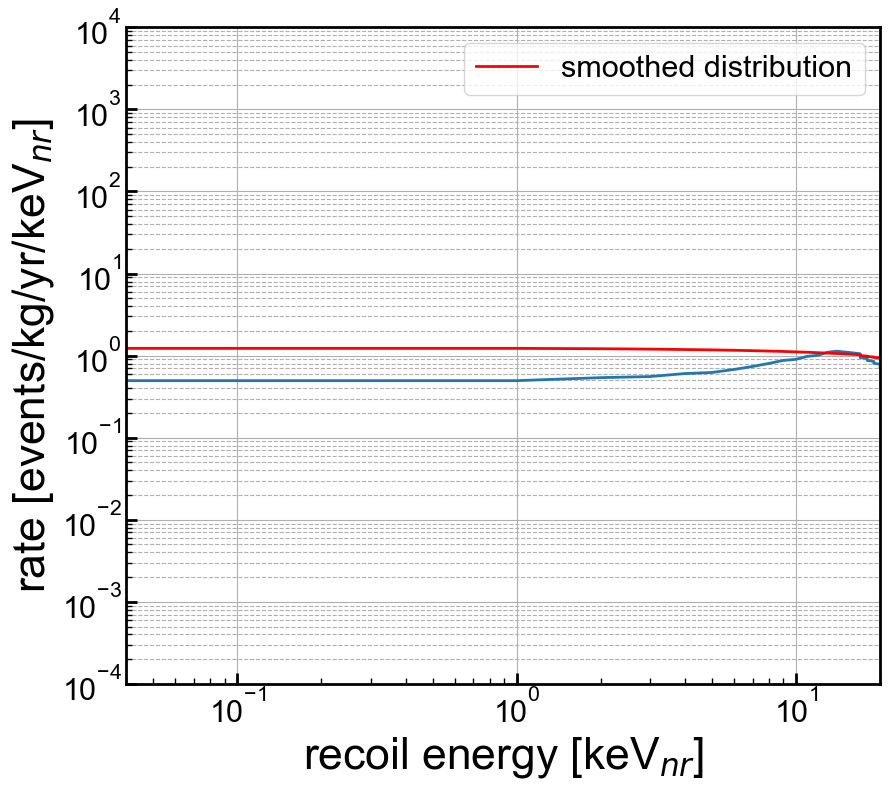

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



#print(estring)
ax1.plot(si_erec, si_rate)
ax1.plot(si_erec, si_rate_smooth,color='r',label="smoothed distribution")


ymin = 1e-4
ymax = 1e4

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(4e-2, 2e1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV$_{nr}$]')
ax1.set_ylabel('rate [events/kg/yr/keV$_{nr}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()